In [2]:
from youtube_transcript_api import YouTubeTranscriptApi
from wordcloud import WordCloud, STOPWORDS

transcript = YouTubeTranscriptApi.get_transcript("i6bORQh_9LQ")
text_list = []
for line in transcript:
    text_list.append(line['text'])

text_string = " ".join(text_list)

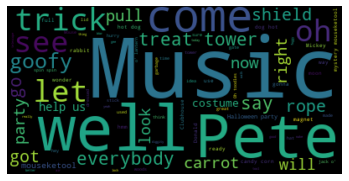

In [5]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
stopwords.update("[Music]")
wordcloud = WordCloud(stopwords=stopwords).generate(text_string)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
from main import create_string_from_transcript

In [16]:
create_string_from_transcript(transcript)

"hey everybody it's me Mickey Mouse say you want to come inside my Clubhouse well alright let's go huh I almost forgot to make the clubhouse appear we get to say the magic words meeska mooska mickey mouse say it with me meeska mooska [Music] [Music] it's the Mickey Mouse Clubhouse Mickey Street welcome to our Clubhouse everybody it's the clubhouse mailbox hmm I wonder what came in the mail today let's see handy helper oh boy it's an invitation to a Halloween party had trigger treat tower I wonder who it's from my big Halloween party and of course nobody ever comes to my party Pete nobody ever goes to his parties well I know we can all go to Pete's party think that'll make him happy ha I think so too [Music] Wow look at all the costumes what's Minnie dressed up as Oh which right and Daisy is little bo-peep what's Donald dressed up as a cowboy gee can anybody guess what Goofy's dressed up as oh no Goofy's a night call me sir goofy [Music] rope and Pluto's dressed up as a beanie Nicky whe

In [17]:
transcript

[{'text': "hey everybody it's me Mickey Mouse",
  'start': 1.79,
  'duration': 7.62},
 {'text': 'say you want to come inside my Clubhouse',
  'start': 5.24,
  'duration': 4.17},
 {'text': "well alright let's go huh I almost",
  'start': 10.34,
  'duration': 10.15},
 {'text': 'forgot to make the clubhouse appear we',
  'start': 17.64,
  'duration': 5.7},
 {'text': 'get to say the magic words', 'start': 20.49, 'duration': 6.9},
 {'text': 'meeska mooska mickey mouse', 'start': 23.34, 'duration': 9.65},
 {'text': 'say it with me meeska mooska', 'start': 27.39, 'duration': 5.6},
 {'text': '[Music]', 'start': 36.26, 'duration': 27.289},
 {'text': '[Music]', 'start': 69.41, 'duration': 18.39},
 {'text': "it's the Mickey Mouse Clubhouse Mickey",
  'start': 83.38,
  'duration': 11.77},
 {'text': 'Street welcome to our Clubhouse', 'start': 87.8, 'duration': 9.74},
 {'text': 'everybody', 'start': 95.15, 'duration': 2.39},
 {'text': "it's the clubhouse mailbox hmm I wonder",
  'start': 99.16,
  'd